# IMPORTS

# Import Libaries

In [209]:
#import libaries
import os
import numpy as np
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [210]:
#Your project should make use of one or more of the following: Relational database, API or web scraping (10)

In [211]:
#Import a CSV file into a Pandas DataFrame (10)

In [212]:
pay_gap=pd.read_csv("Glassdoor Gender Pay Gap.csv")

In [213]:
pay_gap.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [214]:
#check the type of dataframe and if any null values in the datframe
pay_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [215]:
#check for regular null values
pay_gap.isnull().any()

JobTitle     False
Gender       False
Age          False
PerfEval     False
Education    False
Dept         False
Seniority    False
BasePay      False
Bonus        False
dtype: bool

In [216]:
# noted no null values in the data, therefore blanks do not need to be replaced. However, had planks needed to be replaced
# fillna function would have been used: pay_gap = pay_gap.fillna("unknown")

In [217]:
#look at dataframe for unique Job titles
pay_gap['JobTitle'].unique()

array(['Graphic Designer', 'Software Engineer', 'Warehouse Associate',
       'IT', 'Sales Associate', 'Driver', 'Financial Analyst',
       'Marketing Associate', 'Data Scientist', 'Manager'], dtype=object)

In [218]:
#look at dataframe for unique Seniority
pay_gap['Seniority'].unique()

array([2, 5, 4, 3, 1], dtype=int64)

In [219]:
#look at dataframe for unique Gender
pay_gap['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [220]:
pay_gap.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


In [221]:
#Combine the Basepay & Bonus pay to assist with analysis

In [222]:
pay_gap['TotalPay'] = pay_gap['BasePay'] + pay_gap['Bonus']

In [223]:
pay_gap

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
...,...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270,65914
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567,112544
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724,95071
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225,99601


In [224]:
#organise the data in alphabetical order using Job Title
pay_gap = pay_gap.sort_values(by=["JobTitle"], ascending=True)

In [225]:
pay_gap

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
574,Data Scientist,Male,56,3,Masters,Engineering,3,98165,5470,103635
456,Data Scientist,Female,55,3,Masters,Administration,4,123172,5797,128969
265,Data Scientist,Female,29,4,High School,Engineering,3,84021,9111,93132
264,Data Scientist,Male,53,5,High School,Management,2,102910,8335,111245
454,Data Scientist,Male,41,3,Masters,Administration,4,104314,6611,110925
...,...,...,...,...,...,...,...,...,...,...
594,Warehouse Associate,Male,25,2,Masters,Engineering,1,58130,6327,64457
78,Warehouse Associate,Female,39,5,College,Engineering,2,77584,9798,87382
220,Warehouse Associate,Female,51,4,High School,Management,5,121376,7832,129208
266,Warehouse Associate,Female,19,4,High School,Operations,1,37026,8636,45662


In [226]:
#rename index Column
pay_gap.index.rename('Ref_Number', inplace=True)

In [227]:
pay_gap

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
Ref_Number,,,,,,,,,,
574,Data Scientist,Male,56,3,Masters,Engineering,3,98165,5470,103635
456,Data Scientist,Female,55,3,Masters,Administration,4,123172,5797,128969
265,Data Scientist,Female,29,4,High School,Engineering,3,84021,9111,93132
264,Data Scientist,Male,53,5,High School,Management,2,102910,8335,111245
454,Data Scientist,Male,41,3,Masters,Administration,4,104314,6611,110925
...,...,...,...,...,...,...,...,...,...,...
594,Warehouse Associate,Male,25,2,Masters,Engineering,1,58130,6327,64457
78,Warehouse Associate,Female,39,5,College,Engineering,2,77584,9798,87382
220,Warehouse Associate,Female,51,4,High School,Management,5,121376,7832,129208


In [228]:
pay_gap.shape

(1000, 10)

In [229]:
#Review unique education levels and number of these

In [230]:
print('Education Level: ')
pay_gap.Education.value_counts()

Education Level: 


High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

In [231]:
#Remove the column PerfEval

In [232]:
pay_gap = pay_gap.drop('PerfEval', axis=1)

In [233]:
pay_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 574 to 62
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   Education  1000 non-null   object
 4   Dept       1000 non-null   object
 5   Seniority  1000 non-null   int64 
 6   BasePay    1000 non-null   int64 
 7   Bonus      1000 non-null   int64 
 8   TotalPay   1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 78.1+ KB


# Analyse Data

In [234]:
#use Regex to extract a pattern in data (10)

In [235]:
#Replace missing values or drop duplicates (10)

In [236]:
#Make use of iterators(5)

In [237]:
# Merge DataFrames(5)

# Python

In [238]:
#Define a custom function to create reusable code (5)

In [239]:
#NumPy (5)

In [240]:
#Dictionary or Lists (5)

# Machine Learning (30)

In [241]:
#Predict a target variable with Supervised or Unsupervised algorithm

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, log_loss, roc_auc_score
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
plt.style.use('ggplot')

In [243]:
pay_gap_logistic=pay_gap
bins = [17, 35, 50, 66]
labels = ['Young Adults','Middle-aged Adults','Old Adults']
pay_gap_logistic['Age'] = pd.cut(pay_gap_logistic['Age'], bins = bins, labels=labels)

In [244]:
bins = [34000, 100000, 180000]
labels = ['Low income','High income']
pay_gap_logistic['BasePay'] = pd.cut(pay_gap_logistic['BasePay'], bins = bins, labels=labels)
pay_gap_logistic["BasePay"]=pay_gap_logistic.BasePay.replace(to_replace=['Low income','High income'], value=[0, 1])

In [245]:
bins = [1700, 5000, 10000, 11500]
labels = ['Low','Middle','High']
pay_gap_logistic['Bonus'] = pd.cut(pay_gap_logistic['Bonus'], bins = bins, labels=labels)

In [246]:
pay_gap_logistic["Gender"]=pay_gap_logistic.Gender.replace(to_replace=['Male', 'Female'], value=[0, 1])
pay_gap_logistic

,JobTitle,Gender,Age,Education,Dept,Seniority,BasePay,Bonus,TotalPay
Ref_Number,,,,,,,,,
574,Data Scientist,0,Old Adults,Masters,Engineering,3,0,Middle,103635
456,Data Scientist,1,Old Adults,Masters,Administration,4,1,Middle,128969
265,Data Scientist,1,Young Adults,High School,Engineering,3,0,Middle,93132
264,Data Scientist,0,Old Adults,High School,Management,2,1,Middle,111245
454,Data Scientist,0,Middle-aged Adults,Masters,Administration,4,1,Middle,110925
...,...,...,...,...,...,...,...,...,...
594,Warehouse Associate,0,Young Adults,Masters,Engineering,1,0,Middle,64457
78,Warehouse Associate,1,Middle-aged Adults,College,Engineering,2,0,Middle,87382
220,Warehouse Associate,1,Old Adults,High School,Management,5,1,Middle,129208


In [104]:
#Perform hyper parameter tuning or boosting, whichever is relevant to your model. If it is not relevant, justify that in your report and Python comments


# Visualise (10)

In [105]:
#Present two charts with Seaborn or Matplotlib

In [106]:
plt.figure(figsize = (18,6))
jobplot = sns.boxplot(data=pay_gap,x="JobTitle",
y="BasePay", hue='Gender')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1296x432 with 0 Axes>

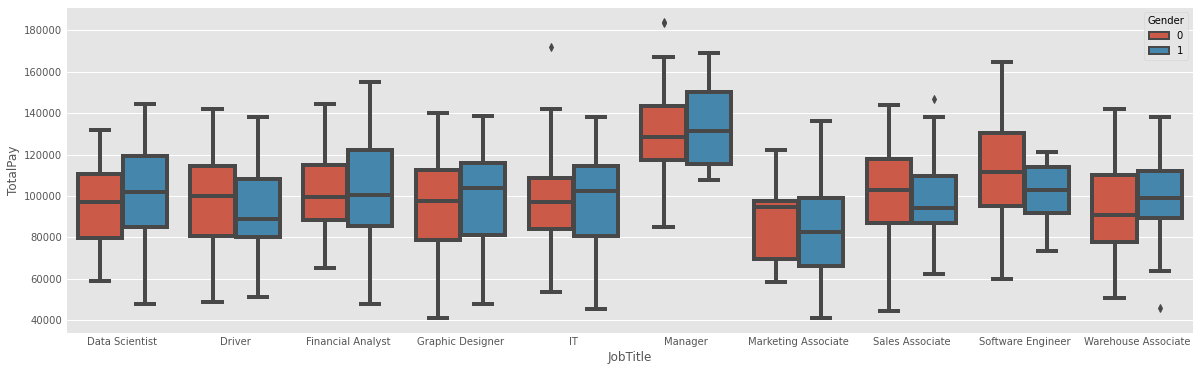

In [107]:
plt.figure(figsize = (18,6))
jobplot = sns.boxplot(data=pay_gap,x="JobTitle",
y="TotalPay", hue='Gender')

Insights

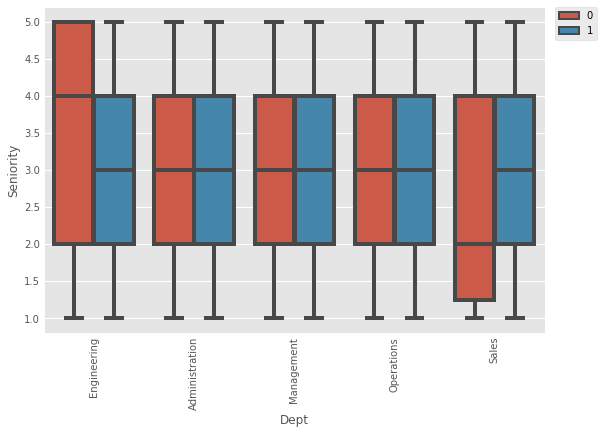

In [108]:
plt.figure(figsize = (8,6))

jobplot = sns.boxplot(data=pay_gap,
x="Dept", y="Seniority", hue='Gender')

jobplot.set_xticklabels(labels=pay_gap['Dept'].unique(), rotation=90) 
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='BasePay'>

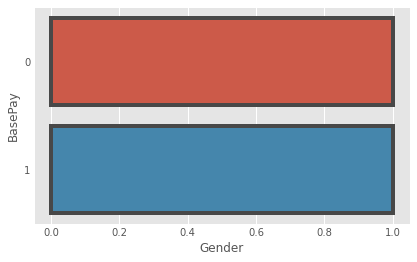

In [109]:
#using a box chart, identify if men are paid more than women
sns.boxplot(data=pay_gap, x='Gender',y='BasePay')

<AxesSubplot:xlabel='Gender', ylabel='TotalPay'>

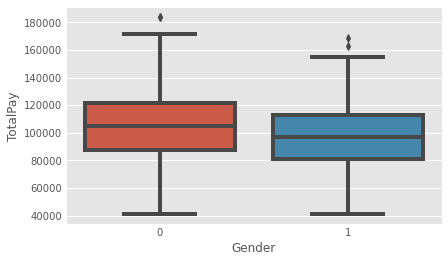

In [110]:
#using a box chart, identify if men are paid more than women
sns.boxplot(data=pay_gap, x='Gender',y='TotalPay')

<AxesSubplot:xlabel='Gender', ylabel='Bonus'>

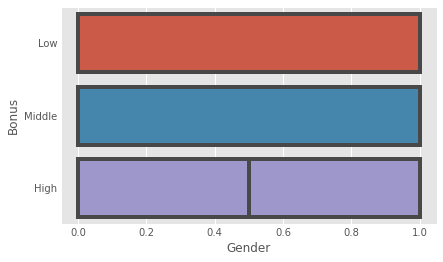

In [111]:
#using a box chart, identify if men are paid more bonuses than women
sns.boxplot(data=pay_gap, x='Gender',y='Bonus')

In [112]:
f, ax = plt.subplots(figsize=(20,7))
sns.histplot(pay_gap, x=pay_gap['Bonus'], hue=pay_gap["Gender"],
    multiple="stack", edgecolor=".3", linewidth=.5, log_scale=True).set(title= 'Female Vs Male Bonus')

C:\Users\MareseFeeney\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



ValueError: Maximum allowed size exceeded

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 1440x504 with 1 Axes>

[Text(0.5, 1.0, 'female to male Total Pay based on education')]

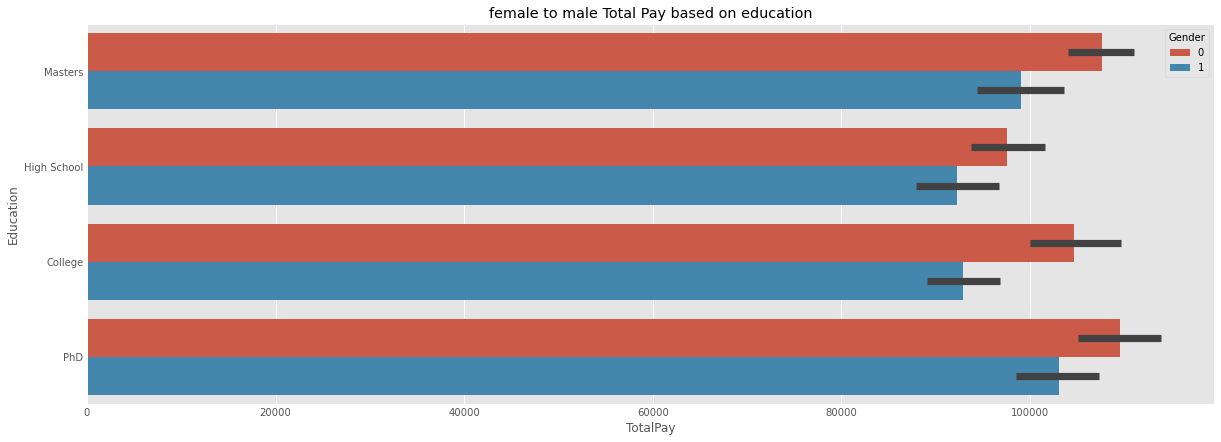

In [113]:
# using barplot, identify if there's a difference in pay based on educationfig, ax = plt.subplots()
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
sns.barplot(x= pay_gap['TotalPay'], y= pay_gap['Education'],hue= pay_gap["Gender"]).set( title= 'female to male Total Pay based on education')

In [142]:
import plotly.graph_objs as go
import plotly.offline as py

In [157]:
title = pd.get_dummies(pay_gap, columns=['Gender']).groupby('JobTitle').sum()

female = go.Pie(labels=title.index,values=title['Gender_Female'],name="Female",hole=0.5,domain={'x': [0,0.46]})
male = go.Pie(labels=title.index,values=title['Gender_Male'],name="Male",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Job Title Breakdown', font=dict(size=14), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[female, male], layout=layout)
py.iplot(fig)

KeyError: 'Gender_Female'

In [144]:
female = pay_gap[pay_gap['Gender'] == 'Female'].groupby('JobTitle').sum()
male = pay_gap[pay_gap['Gender'] == 'Male'].groupby('JobTitle').sum()

In [156]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['BasePay']),
    go.Bar(name='Male', x=male.index, y=male['BasePay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='BasePay Gap by JobTitle')
fig.show()

In [155]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['TotalPay']),
    go.Bar(name='Male', x=male.index, y=male['TotalPay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='Total Pay Gap by JobTitle')
fig.show()

In [147]:
female = pay_gap[pay_gap['Gender'] == 'Female'].groupby('Dept').sum()
male = pay_gap[pay_gap['Gender'] == 'Male'].groupby('Dept').sum()

fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['TotalPay']),
    go.Bar(name='Male', x=male.index, y=male['TotalPay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='Total Pay Gap by Dept')
fig.show()

In [148]:
pay_gap2=pd.read_csv("Glassdoor Gender Pay Gap.csv")

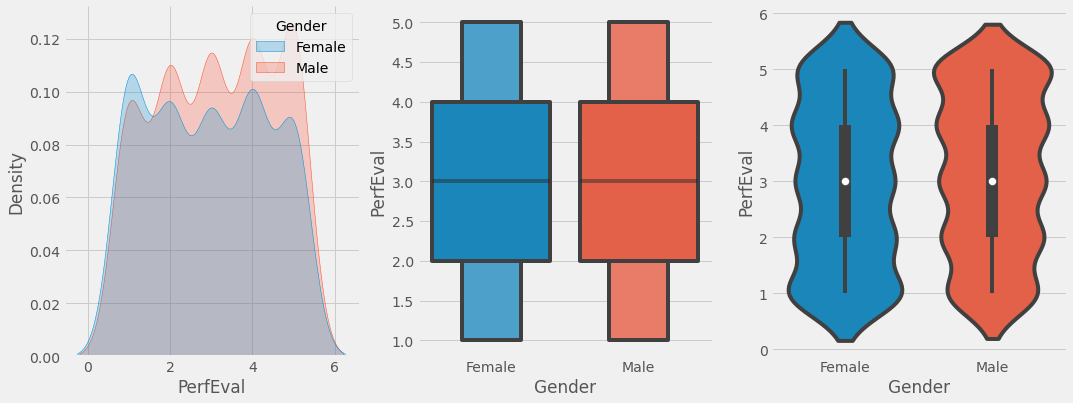

In [149]:
#Gender-Evaluation distribution 
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
#sns.set_style('ticks')

sns.kdeplot(data=pay_gap2, x='PerfEval', hue='Gender', fill=True, ax=ax[0])
sns.boxenplot(data=pay_gap2, x='Gender', y='PerfEval', ax=ax[1])

sns.violinplot(data=pay_gap2, x='Gender', y='PerfEval', ax=ax[2])

sns.despine()
plt.show()

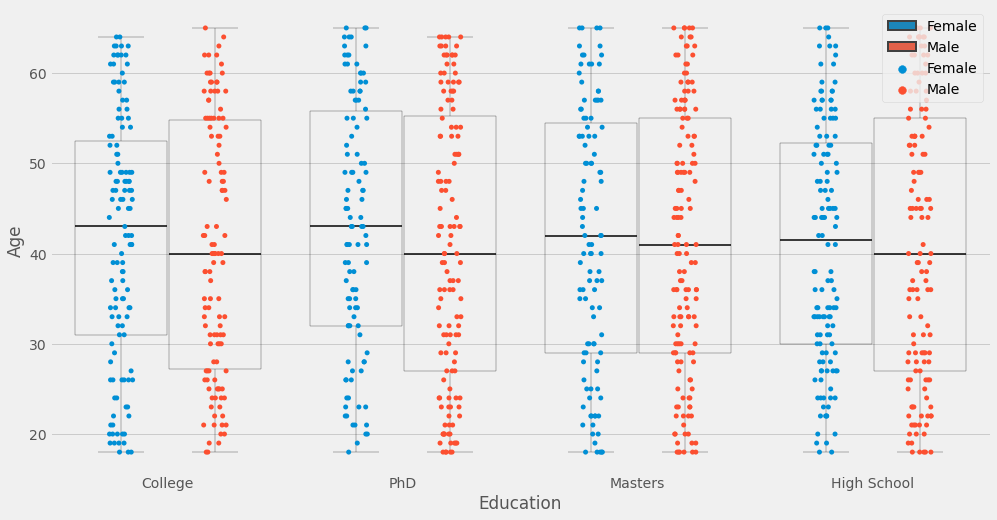

In [150]:
plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')
#sns.set_style('ticks')
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black', 'linewidth':0.3},
    'medianprops':{'color':'black', 'linewidth':1.5},
    'whiskerprops':{'color':'black', 'linewidth':0.3},
    'capprops':{'color':'black', 'linewidth':0.3},
}

sns.boxplot(x='Education', data=pay_gap2, y='Age', hue='Gender', showfliers=False,  **PROPS)
sns.stripplot(data=pay_gap2, x='Education', hue='Gender', y='Age', dodge=True)

sns.despine()
plt.legend(loc='upper right')
plt.show()

In [151]:
pay_gap2['TotalPay'] = pay_gap2['BasePay'] + pay_gap2['Bonus']

In [152]:
female = pay_gap2[pay_gap2['Gender'] == 'Female'].groupby('JobTitle').sum()
male = pay_gap2[pay_gap2['Gender'] == 'Male'].groupby('JobTitle').sum()

female['BasePay'] /= title['Gender_Female'].tolist()
female['TotalPay'] /= title['Gender_Female'].tolist()
female['Bonus'] /= title['Gender_Female'].tolist()
male['BasePay'] /= title['Gender_Male'].tolist()
male['TotalPay'] /= title['Gender_Male'].tolist()
male['Bonus'] /= title['Gender_Male'].tolist()

KeyError: 'Gender_Female'

In [153]:
fig = go.Figure(data=[
    go.Bar(name='Female', x=female.index, y=female['BasePay']),
    go.Bar(name='Male', x=male.index, y=male['BasePay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='BasePay Gap by JobTitle')
fig.show()

In [154]:
fig = go.Figure(data=[
    go.Bar(name='Difference', x=female.index, y= male['TotalPay'] - female['TotalPay'])
])
# Change the bar mode
fig.update_layout(barmode='group', title='Total Pay [Male - Female]')
fig.show()

In [127]:
diff = (female['TotalPay'] - male['TotalPay']).tolist()
titles = male.index.tolist()

for i in range(len(diff)):
    if diff[i] > 0:
        print('Women make ' + str(int(diff[i])) + ' more than men as a ' + titles[i])
    else:
        print('Women make ' + str(int(-diff[i])) + ' less than Men as a ' + titles[i])

Women make 275670 more than men as a Data Scientist
Women make 141723 less than Men as a Driver
Women make 879310 less than Men as a Financial Analyst
Women make 86304 less than Men as a Graphic Designer
Women make 368876 more than men as a IT
Women make 7028502 less than Men as a Manager
Women make 7831095 more than men as a Marketing Associate
Women make 922088 less than Men as a Sales Associate
Women make 10607236 less than Men as a Software Engineer
Women make 495862 more than men as a Warehouse Associate


In [49]:
#5 insights from the project (10)

In [171]:
pattern = r'\banalyst\b'

In [182]:
re.findall(r"\w\+ analyst", JobTitle)

NameError: name 'JobTitle' is not defined

In [184]:
JobTitle = pay_gap, "JobTitle"

In [185]:
re.findall(r"\w\+ analyst", JobTitle)

TypeError: expected string or bytes-like object

In [ ]:
#Reg Expression

In [173]:
def count_analysts(pay_gap, JobTitle, pattern):
    count = 0
    for value in pay_gap[JobTitle]:
        matches = re.findall(pattern, value, flags=re.IGNORECASE)
        count += len(matches)
    return count

In [186]:
analyst_count = count_analysts(pay_gap, 'JobTitle', pattern)

In [187]:
print(f'The word "analyst" appears {analyst_count} times in the JobTitle column.')

The word "analyst" appears 107 times in the JobTitle column.


In [197]:
# define function to get unique words from a column
def get_unique_words(pay_gap, JobTitle):
    all_text = ' '.join(pay_gap[JobTitle].astype(str).tolist())
    all_words = all_text.split()
    return set(all_words)

In [201]:
# call function on example dataframe and print results
unique_words = get_unique_words(pay_gap, 'JobTitle')
print(f'The unique words in the "JobTitle" column are: {unique_words}')

The unique words in the "JobTitle" column are: {'Financial', 'Marketing', 'Scientist', 'Analyst', 'Graphic', 'Software', 'Driver', 'Engineer', 'IT', 'Sales', 'Warehouse', 'Associate', 'Data', 'Manager', 'Designer'}


In [203]:
# define list of 15 unique words to search for

In [204]:
unique_words = ['Financial', 'Marketing', 'Scientist', 'Analyst', 'Graphic', 'Software', 'Driver', 'Engineer', 'IT', 'Sales', 'Warehouse', 'Associate', 'Data', 'Manager', 'Designer']

In [205]:
# create function to count occurrences of each unique word in column

In [206]:
def count_words(pay_gap, JobTitle, words):
    counts = {word: 0 for word in words}
    for value in pay_gap[JobTitle]:
        for word in words:
            pattern = fr'\b{word}\b'
            matches = re.findall(pattern, value, flags=re.IGNORECASE)
            counts[word] += len(matches)
    return counts

In [207]:
# call function and print results
word_counts = count_words(pay_gap, 'JobTitle', unique_words)
for word, count in word_counts.items():
    print(f'The word "{word}" appears {count} times in the JobTitle column.')

The word "Financial" appears 107 times in the JobTitle column.
The word "Marketing" appears 118 times in the JobTitle column.
The word "Scientist" appears 107 times in the JobTitle column.
The word "Analyst" appears 107 times in the JobTitle column.
The word "Graphic" appears 98 times in the JobTitle column.
The word "Software" appears 109 times in the JobTitle column.
The word "Driver" appears 91 times in the JobTitle column.
The word "Engineer" appears 109 times in the JobTitle column.
The word "IT" appears 96 times in the JobTitle column.
The word "Sales" appears 94 times in the JobTitle column.
The word "Warehouse" appears 90 times in the JobTitle column.
The word "Associate" appears 302 times in the JobTitle column.
The word "Data" appears 107 times in the JobTitle column.
The word "Manager" appears 90 times in the JobTitle column.
The word "Designer" appears 98 times in the JobTitle column.


In [ ]:
def count_analysts(pay_gap, JobTitle, pattern):
    count = 0
    for value in pay_gap[JobTitle]:
        matches = re.findall(pattern, value, flags=re.IGNORECASE)
        count += len(matches)
    return count

In [193]:
# define function to get unique words from a column
def get_unique_words(df, col_name):
    # combine all values in column into a single string
    all_text = ' '.join(df[col_name].astype(str).tolist())
    # split string into individual words
    all_words = all_text.split()
    # return set of unique words
    return set(all_words)

In [ ]:
# call function on example dataframe and print results
unique_words = get_unique_words(df, 'text')
print(f'The unique words in the "text" column are: {unique_words}')